In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import model_from_json

In [2]:
start_date = '2017-01-01'
end_date = '2023-12-31'

df = yf.Ticker("^GSPC").history(start=start_date, end=end_date)

In [3]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03 00:00:00-05:00,2251.570068,2263.879883,2245.129883,2257.830078,3773010000,0.0,0.0
2017-01-04 00:00:00-05:00,2261.600098,2272.820068,2261.600098,2270.750000,3768890000,0.0,0.0
2017-01-05 00:00:00-05:00,2268.179932,2271.500000,2260.449951,2269.000000,3785080000,0.0,0.0
2017-01-06 00:00:00-05:00,2271.139893,2282.100098,2264.060059,2276.979980,3342080000,0.0,0.0
2017-01-09 00:00:00-05:00,2273.590088,2275.489990,2268.899902,2268.899902,3219730000,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0


In [4]:
data = df[['Close']]
data

,Close
Date,
2017-01-03 00:00:00-05:00,2257.830078
2017-01-04 00:00:00-05:00,2270.750000
2017-01-05 00:00:00-05:00,2269.000000
2017-01-06 00:00:00-05:00,2276.979980
2017-01-09 00:00:00-05:00,2268.899902
...,...
2023-12-22 00:00:00-05:00,4754.629883
2023-12-26 00:00:00-05:00,4774.750000
2023-12-27 00:00:00-05:00,4781.580078


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define a function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Create sequences
seq_length = 60  # Number of previous days to consider for each prediction
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [6]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [8]:
# Define the early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, batch_size=1, epochs=100, callbacks=[early_stopping])


Epoch 1/100
1359/1359 [==============================] - 48s 33ms/step - loss: 0.0023
Epoch 2/100
1359/1359 [==============================] - 44s 32ms/step - loss: 0.0011
Epoch 3/100
1359/1359 [==============================] - 45s 33ms/step - loss: 7.6849e-04
Epoch 4/100
1359/1359 [==============================] - 44s 32ms/step - loss: 7.1040e-04
Epoch 5/100
1359/1359 [==============================] - 44s 32ms/step - loss: 5.8664e-04
Epoch 6/100
1359/1359 [==============================] - 47s 34ms/step - loss: 5.4578e-04
Epoch 7/100
1359/1359 [==============================] - 44s 32ms/step - loss: 5.2441e-04
Epoch 8/100
1359/1359 [==============================] - 44s 32ms/step - loss: 4.6007e-04
Epoch 9/100
1359/1359 [==============================] - 44s 32ms/step - loss: 5.1038e-04
Epoch 10/100
1359/1359 [==============================] - 44s 32ms/step - loss: 4.6537e-04
Epoch 11/100
1359/1359 [==============================] - 43s 32ms/step - loss: 4.3894e-04
Epoch 12/100
135

11/11 [==============================] - 2s 24ms/step


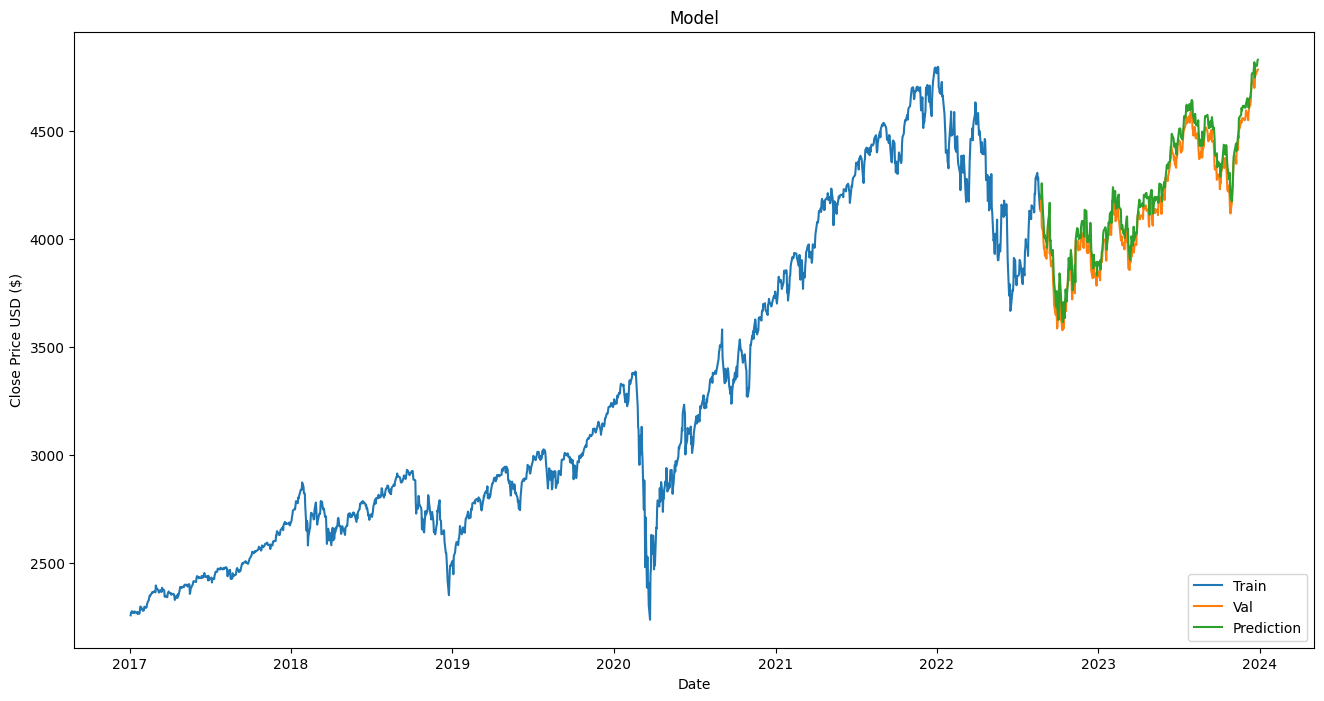

In [9]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Create a dataframe to hold the predicted prices and actual prices
train = data.iloc[:train_size + seq_length]
valid = data.iloc[train_size + seq_length:]

# Ensure the lengths match by slicing the validation set to match predicted prices length
valid = valid.iloc[:len(predicted_prices)]
valid['Predictions'] = predicted_prices

# Plot the predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()


In [10]:
# Predicting the next day's closing price
last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print("Predicted Price:", pred_price[0][0])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
Predicted Price: 4819.207


In [11]:
# Save model architecture to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


In [12]:
# Load model architecture from JSON
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into the new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# Compile the loaded model
loaded_model.compile(optimizer='adam', loss='mean_squared_error')


Loaded model from disk
